# HW 3

Problem 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28221 entries, 0 to 28220
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          28221 non-null  int64 
 1   OPEID                       28221 non-null  int64 
 2   Institution Name            28221 non-null  object
 3   City                        28221 non-null  object
 4   State                       28221 non-null  object
 5   Foreign Gift Received Date  28221 non-null  int64 
 6   Foreign Gift Amount         28221 non-null  int64 
 7   Gift Type                   28221 non-null  object
 8   Country of Giftor           28221 non-null  object
 9   Giftor Name                 24470 non-null  object
dtypes: int64(4), object(6)
memory usage: 2.2+ MB


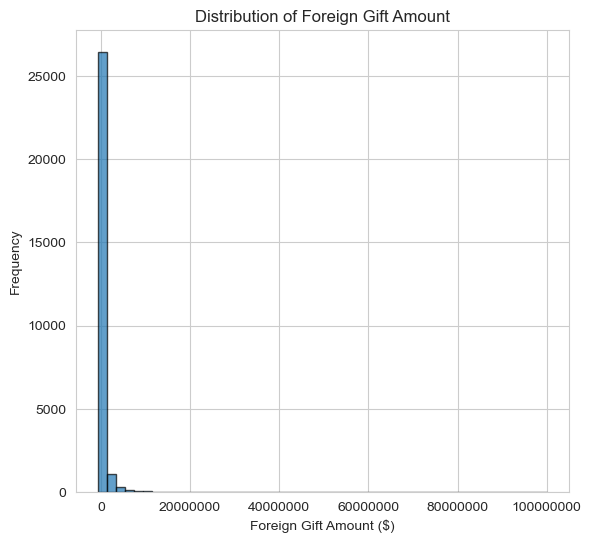

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

f_gifts = pd.read_csv('./ForeignGifts_edu.csv')

f_gifts.shape
f_gifts.head()
f_gifts.columns.tolist()
f_gifts.dtypes
f_gifts.info()

f_gifts['Foreign Gift Amount'].describe()
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(f_gifts['Foreign Gift Amount'].dropna(), bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Foreign Gift Amount ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Foreign Gift Amount')
plt.ticklabel_format(style='plain', axis='x')

The distribution is extremely right-skewed with most gifts being relatively small. The median gift amount is much smaller than the mean, indicating extreme values. A few very large gifts significantly increase the average.

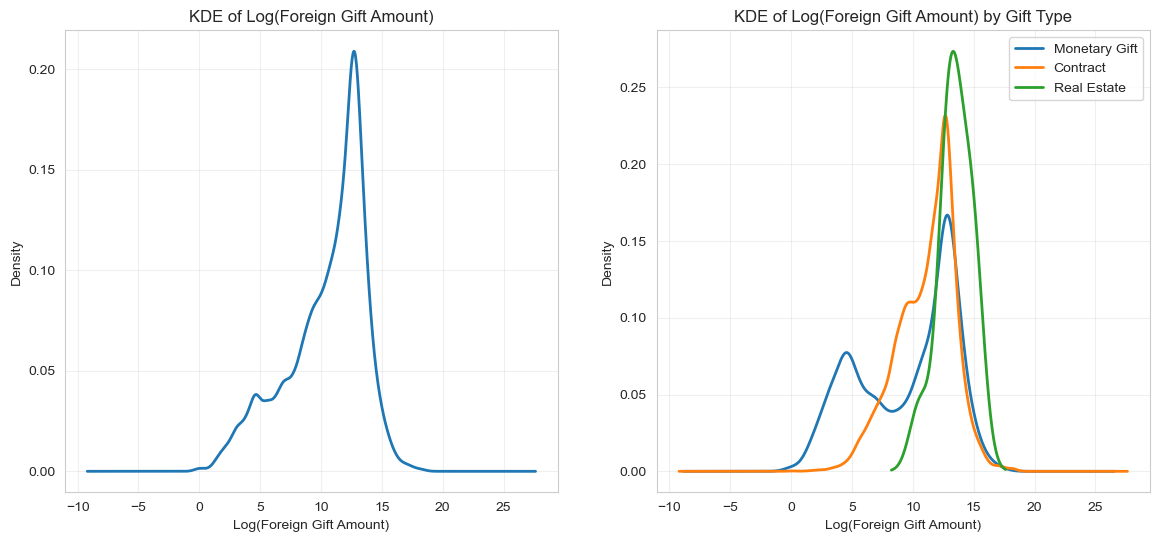

In [17]:
gift_type_counts = f_gifts['Gift Type'].value_counts()
gift_type_counts

gift_type_proportions = f_gifts['Gift Type'].value_counts(normalize=True)
gift_type_proportions

f_gifts_positive = f_gifts[f_gifts['Foreign Gift Amount'] > 0].copy()
f_gifts_positive['log_amount'] = np.log(f_gifts_positive['Foreign Gift Amount'])
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
f_gifts_positive['log_amount'].plot(kind='kde', linewidth=2)
plt.xlabel('Log(Foreign Gift Amount)')
plt.ylabel('Density')
plt.title('KDE of Log(Foreign Gift Amount)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
for gift_type in f_gifts_positive['Gift Type'].unique():
    if pd.notna(gift_type):
        subset = f_gifts_positive[f_gifts_positive['Gift Type'] == gift_type]['log_amount']
        subset.plot(kind='kde', label=gift_type, linewidth=2)
plt.xlabel('Log(Foreign Gift Amount)')
plt.ylabel('Density')
plt.title('KDE of Log(Foreign Gift Amount) by Gift Type')
plt.legend()
plt.grid(True, alpha=0.3)



Different gift types show different distributions in terms of amount. Some gift types tend to have higher average amounts than others. The log transformation helps normalize the highly skewed distribution.


Top 15 countries by NUMBER of gifts:
Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
dtype: int64

Top 15 countries by TOTAL AMOUNT given:
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA             

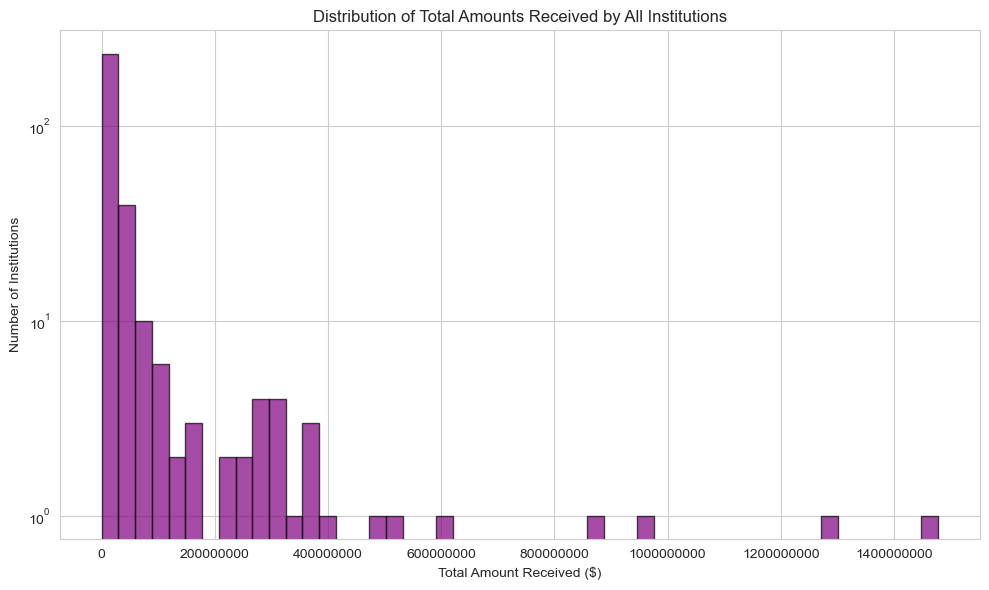

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Sanofi-Aventis Recerche                  62106706
Saudi Arabia                             59450098
Sanofi-Aventis Recherche                 58520202
Skolkovo Foundation                      51500000
Stavros S. Niarchos Foundation        

In [ ]:
top_countries_count = f_gifts.groupby('Country of Giftor').size().sort_values(ascending=False).head(15)
top_countries_amount = f_gifts.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print("\nTop 15 countries by NUMBER of gifts:")
print(top_countries_count)
print("\nTop 15 countries by TOTAL AMOUNT given:")
print(top_countries_amount)

top_institutions = f_gifts.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
top_institutions
institution_totals = f_gifts.groupby('Institution Name')['Foreign Gift Amount'].sum()
plt.figure(figsize=(10, 6))
plt.hist(institution_totals, bins=50, edgecolor='black', alpha=0.7, color='purple')
plt.xlabel('Total Amount Received ($)')
plt.ylabel('Number of Institutions')
plt.title('Distribution of Total Amounts Received by All Institutions')
plt.yscale('log')
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()
plt.close()

top_giftors = f_gifts.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(20)
print(top_giftors)



Problem 2

In [60]:
airbnb = pd.read_csv('./airbnb_hw.csv')
airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors='coerce')
print("Dimensions:",airbnb.shape)
print(f"Number of observations: {airbnb.shape[0]}")
print(f"Number of variables: {airbnb.shape[1]}")
print(airbnb.columns.tolist())
airbnb.head()

crosstab = pd.crosstab(airbnb['Room Type'], airbnb['Property Type'], margins=True)
print(crosstab)


Dimensions: (30478, 13)
Number of observations: 30478
Number of variables: 13
['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type', 'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', 'Review Scores Rating']
Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   
All                  27102              180     8         4      2          7   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           

Apartments dominate Airbnb rentals, with entire home/apt being the most common rental type overall. Private rooms are more common than entire properties for Bed & Breakfasts, Houses, Dorms, and Huts.

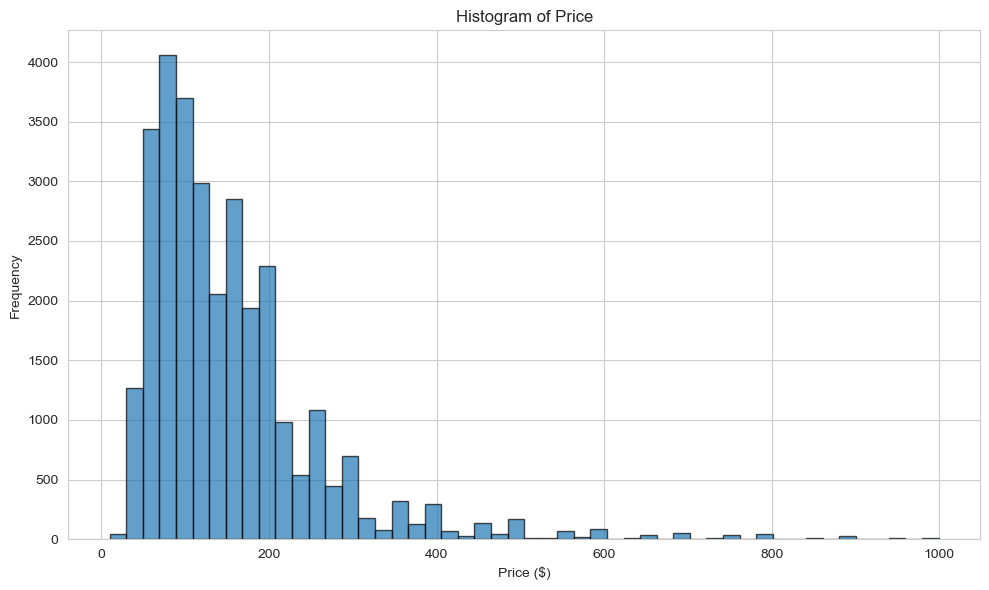

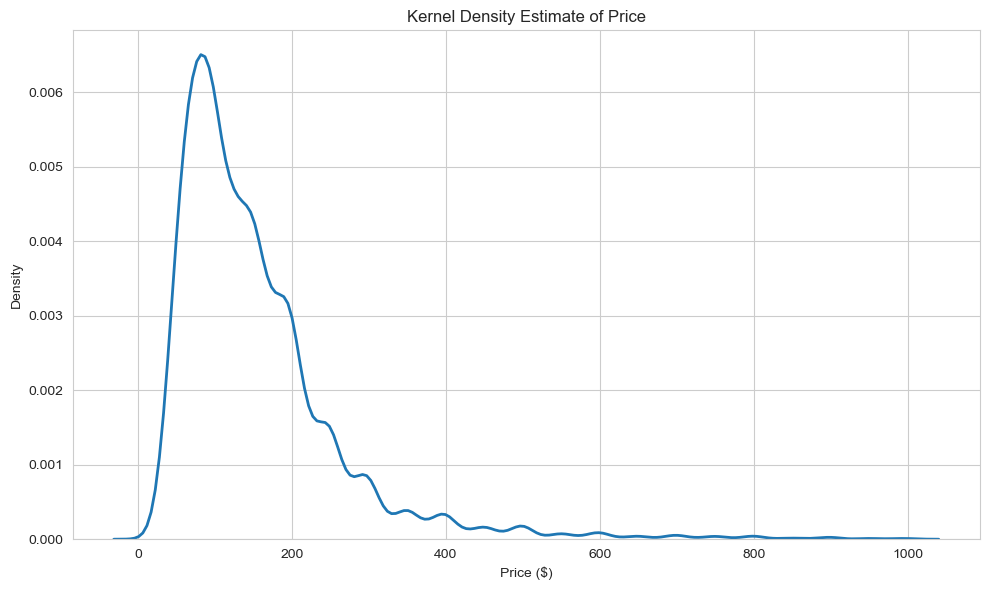

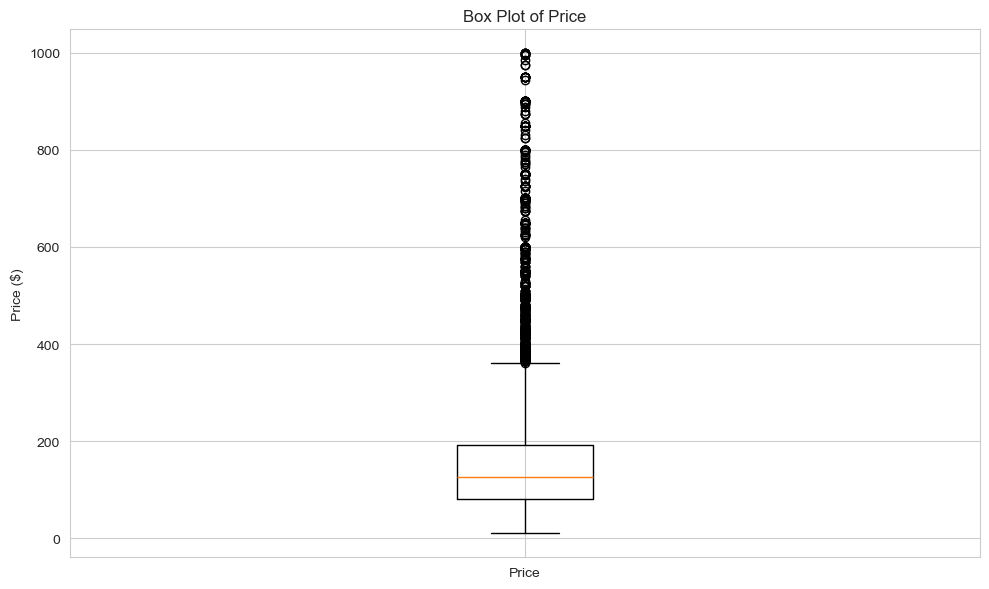

Min: 10.0
Max: 999.0
Standard Deviation: 108.89569843593749


7.992

In [ ]:
# Price Histogram
plt.figure(figsize=(10, 6))
plt.hist(airbnb['Price'].dropna(), bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.tight_layout()
plt.show()

# Price KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(data=airbnb['Price'].dropna(), linewidth=2)
plt.xlabel('Price ($)')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Price')
plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(airbnb['Price'].dropna())
plt.ylabel('Price ($)')
plt.title('Box Plot of Price')
plt.xticks([1], ['Price'])
plt.tight_layout()
plt.show()

airbnb['Price'].describe()
print("Min:", airbnb['Price'].min())
print("Max:",airbnb['Price'].max())

Yes the data is badly scaled because the box plot show us a bunch of outliers.

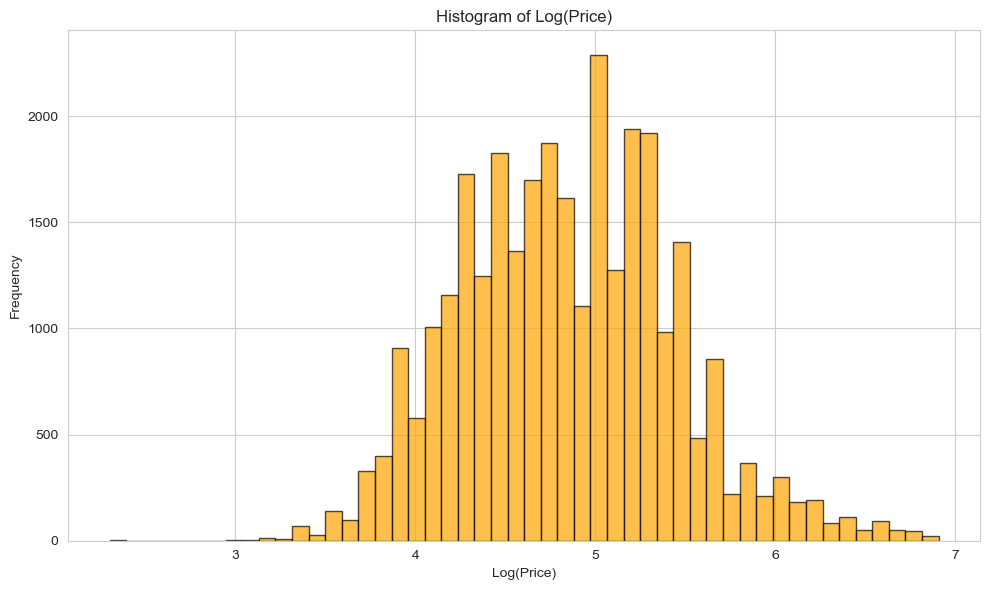

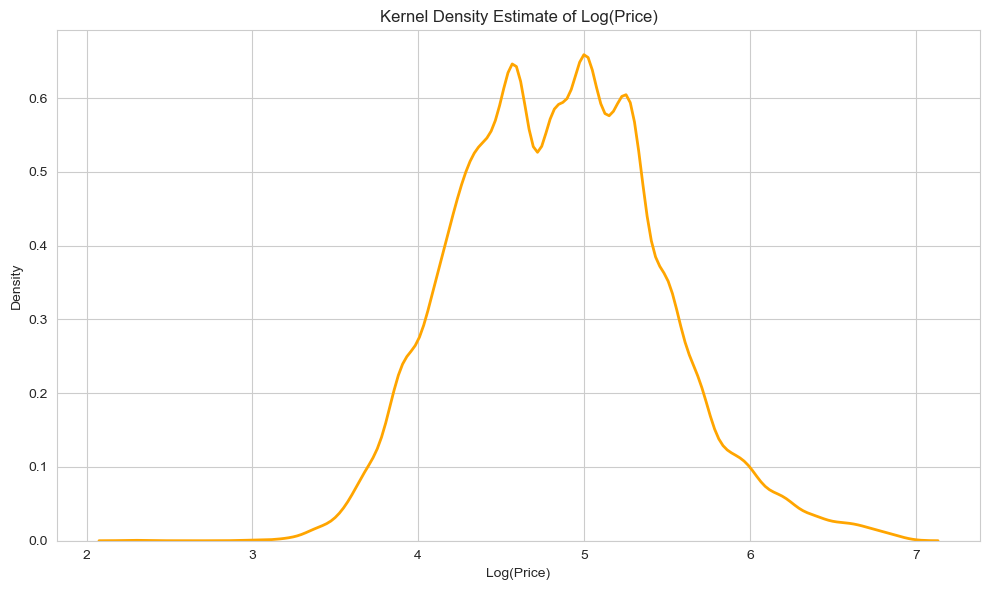

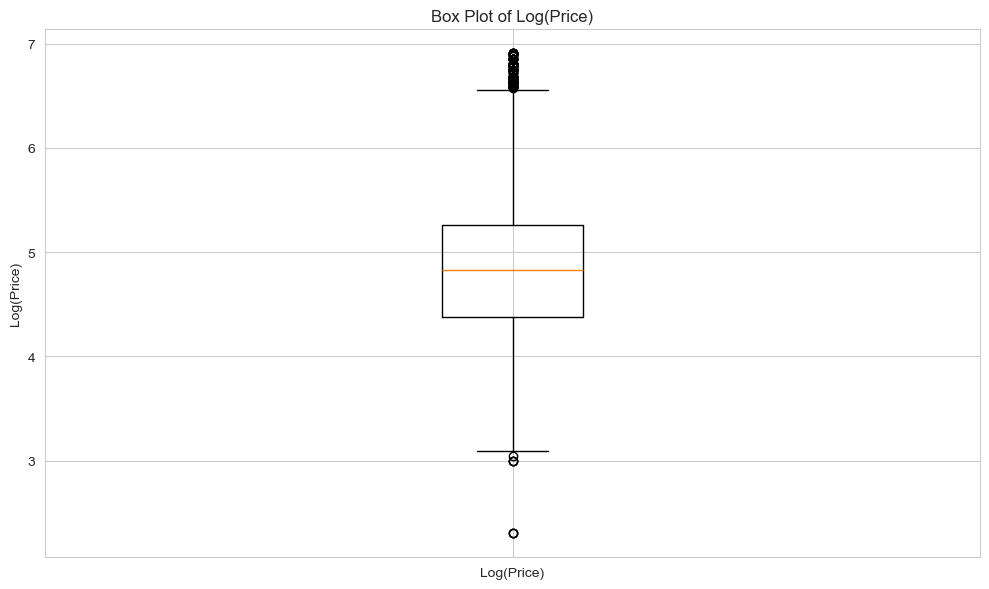

In [ ]:
# Log-Transformed Price
airbnb['price_log'] = np.log(airbnb['Price'])

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(airbnb['price_log'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='orange')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.title('Histogram of Log(Price)')
plt.tight_layout()
plt.show()

# KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(data=airbnb['price_log'].dropna(), linewidth=2, color='orange')
plt.xlabel('Log(Price)')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Log(Price)')
plt.tight_layout()
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
plt.boxplot(airbnb['price_log'].dropna())
plt.ylabel('Log(Price)')
plt.title('Box Plot of Log(Price)')
plt.xticks([1], ['Log(Price)'])
plt.tight_layout()
plt.show()




The original price data is heavily right-skewed with extreme outliers while the log transformation normalizes the distribution significantly and the log-transformed data now appears more normally distributed.

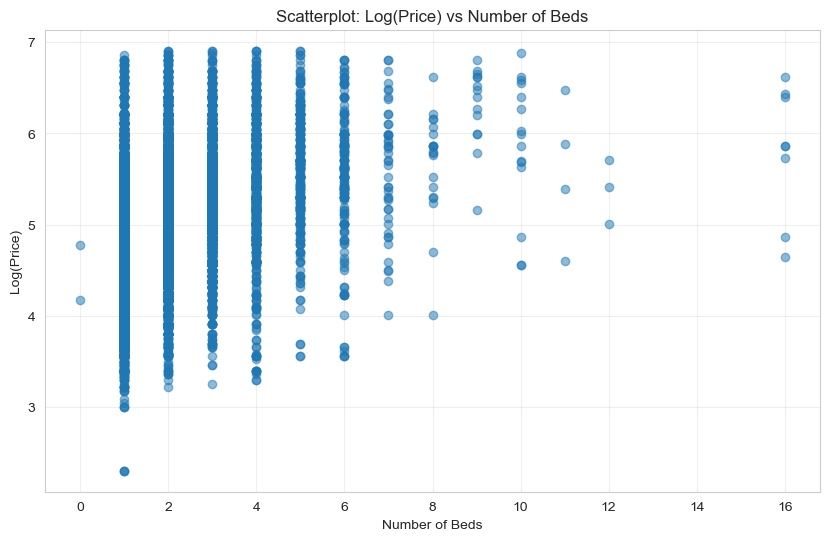

,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,92.000000,38.183766,65.0,78.50,92.0,105.50,119.0
1.0,20307.0,124.757670,75.685752,10.0,75.00,100.0,155.00,950.0
2.0,6561.0,186.702332,115.044205,25.0,115.00,160.0,225.00,999.0
3.0,2029.0,234.928043,142.288189,26.0,140.00,200.0,299.00,999.0
4.0,766.0,280.554830,175.512312,27.0,150.00,240.0,363.75,999.0
5.0,274.0,322.000000,190.319415,35.0,186.00,285.0,425.00,995.0
6.0,166.0,316.313253,201.157585,35.0,183.75,271.0,399.00,900.0
7.0,45.0,341.377778,220.116631,55.0,177.00,300.0,445.00,900.0
8.0,20.0,331.850000,155.652202,55.0,218.75,339.5,408.75,750.0


In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(airbnb['Beds'], airbnb['price_log'], alpha=0.5)
plt.xlabel('Number of Beds')
plt.ylabel('Log(Price)')
plt.title('Scatterplot: Log(Price) vs Number of Beds')
plt.grid(True, alpha=0.3)
plt.show()

beds_grouped = airbnb.groupby('Beds')['Price'].describe()
beds_grouped


Generally positive relationship between number of beds and log of price. More beds seem to correlate with higher prices and there is significant variation in prices for any given number of beds.
Some patterns I observed are that the mean price increases with number of beds and the standard deviation also tends to increase with more beds. This suggests both higher prices and more price variation for larger properties.

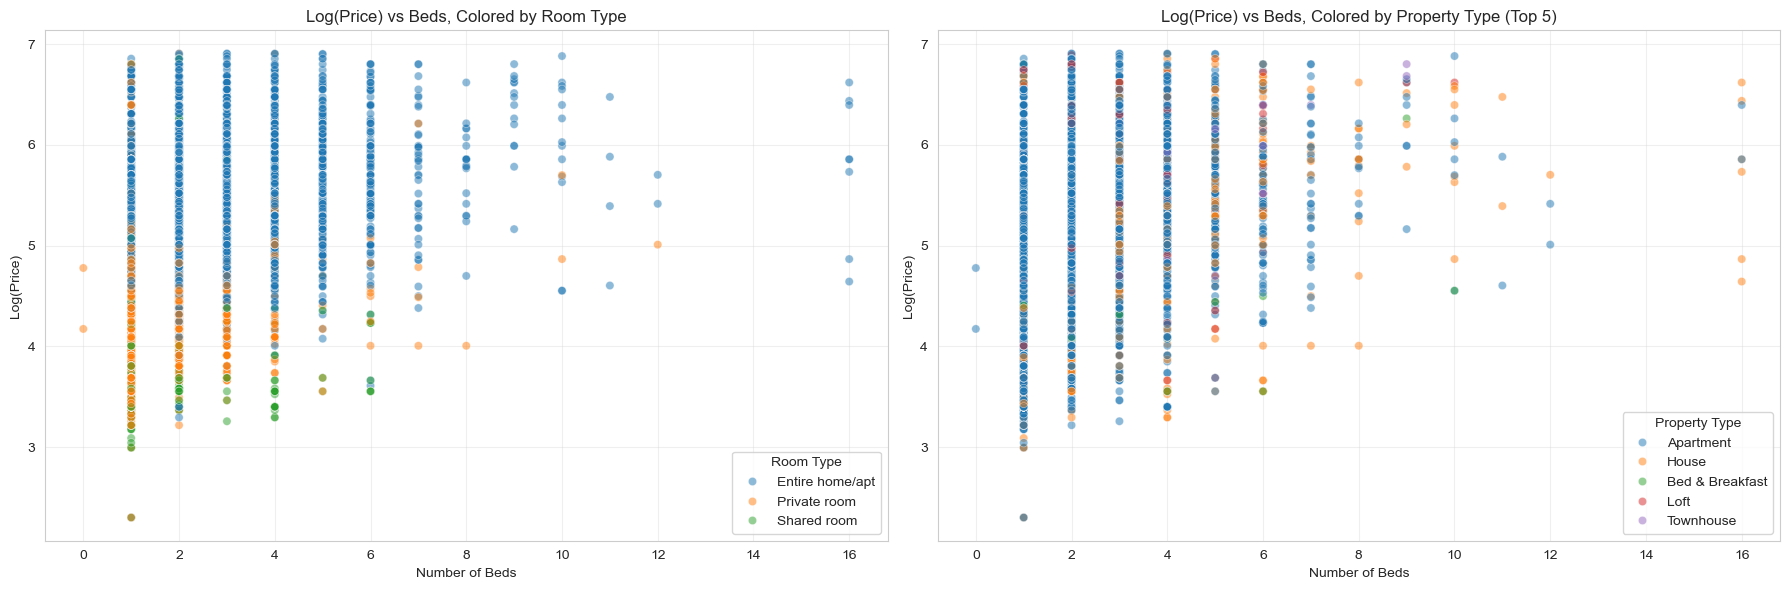

,count,mean,std,min,25%,50%,75%,max
Property Type,,,,,,,,
Apartment,26975.0,153.863170,104.112805,10.0,85.00,129.0,195.00,999.0
Bed & Breakfast,180.0,106.572222,84.701977,30.0,65.00,87.5,125.00,900.0
Boat,8.0,153.625000,49.231051,100.0,120.00,137.5,178.50,250.0
Bungalow,4.0,150.750000,46.464144,87.0,133.50,160.5,177.75,195.0
Cabin,2.0,165.000000,120.208153,80.0,122.50,165.0,207.50,250.0
Camper/RV,7.0,103.571429,102.343958,39.0,47.00,49.0,109.00,325.0
Castle,1.0,150.000000,NaN,150.0,150.00,150.0,150.00,150.0
Chalet,1.0,99.000000,NaN,99.0,99.00,99.0,99.00,99.0
Condominium,93.0,237.946237,172.754121,46.0,130.00,175.0,295.00,850.0


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Color by Room Type
sns.scatterplot(data=airbnb, x='Beds', y='price_log', hue='Room Type', alpha=0.5, ax=axes[0])
axes[0].set_xlabel('Number of Beds')
axes[0].set_ylabel('Log(Price)')
axes[0].set_title('Log(Price) vs Beds, Colored by Room Type')
axes[0].grid(True, alpha=0.3)

# Color by Property Type
top_property_types = airbnb['Property Type'].value_counts().head(5).index
df_top_props = airbnb[airbnb['Property Type'].isin(top_property_types)]

sns.scatterplot(data=df_top_props, x='Beds', y='price_log', hue='Property Type', alpha=0.5, ax=axes[1])
axes[1].set_xlabel('Number of Beds')
axes[1].set_ylabel('Log(Price)')
axes[1].set_title('Log(Price) vs Beds, Colored by Property Type (Top 5)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Different room types cluster at different price levels. Entire home/apt generally has higher prices than private/shared rooms. We can observe that property type also influences pricing patterns.

In [81]:
room_type_stats = airbnb.groupby('Room Type')['Price'].describe()
prop_type_stats = airbnb.groupby('Property Type')['Price'].describe()
# Highest Average Price
print(room_type_stats['mean'].idxmax())
print(prop_type_stats['mean'].idxmax())

# Highest Standard Deviation in Price
print(room_type_stats['std'].idxmax())
print(prop_type_stats['std'].idxmax())

Entire home/apt
Condominium
Entire home/apt
Other


The median appears to be a more reliable estimate because mean is heavily influenced by extreme outliers. Median is resistant to outliers and better represents typical rental price. The large difference between mean and median indicates skewed distribution.

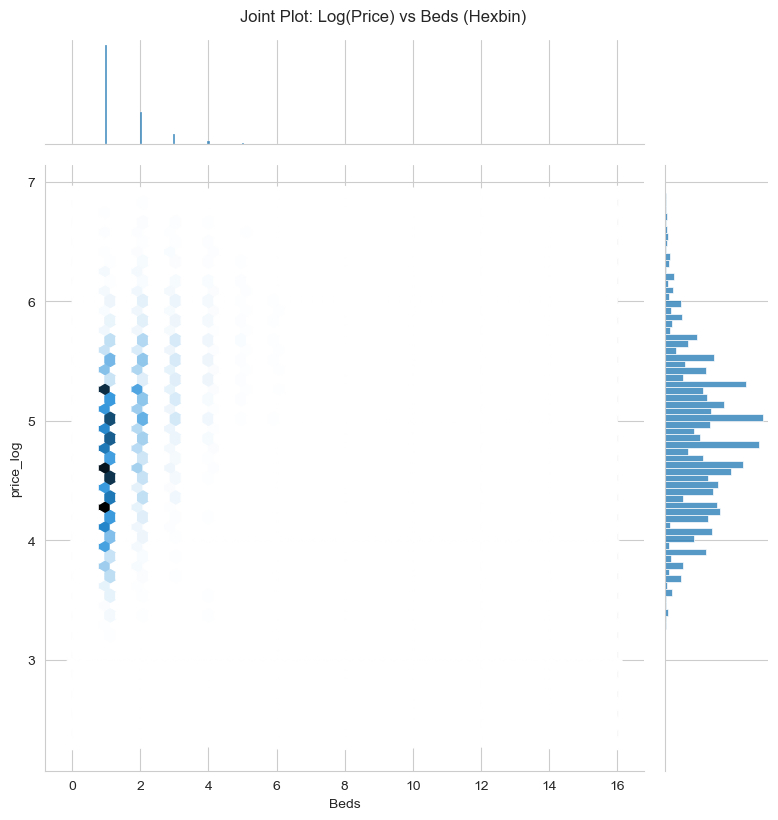

In [82]:
sns.jointplot(data=airbnb, x='Beds', y='price_log', kind='hex', height=8)
plt.suptitle('Joint Plot: Log(Price) vs Beds (Hexbin)', y=1.02)
plt.show()

Most rentals have 1-2 beds. The density is highest in the lower bed count, mid-price range. There are very few properties with more than 5 beds. The hexbin plot reveals concentration that scatter plots obscure.

Scatter plots in questions 5 and 6 can be misleading due to overplotting. Many points overlap in the 1-2 bed range, making it seem less dense than it is. The hexbin plot shows the true concentration of data and the outliers and sparse regions are more apparent. This suggests we should focus analysis on 1-3 bed properties where most data lies.

Problem 3

In [90]:
drilling = pd.read_csv('./drilling_rigs.csv')

print("Observations:",drilling.shape[0])
print("Number of variables:",drilling.shape[1])

print(drilling.isnull().sum())
print(drilling.dtypes)
drilling.head()

Observations: 623
Number of variables: 10
Month                                                                                          0
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                   0
Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                  0
Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                     0
Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                   0
Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)     0
Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)    0
Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)       0
Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                     0
Active Well Service Rig Count (Number of Rigs)                                       

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991


Month variable needs to be converted to datetime format. Any numeric columns showing as 'object' type need to be converted to numeric. Check for missing values (NaN) that may need handling.

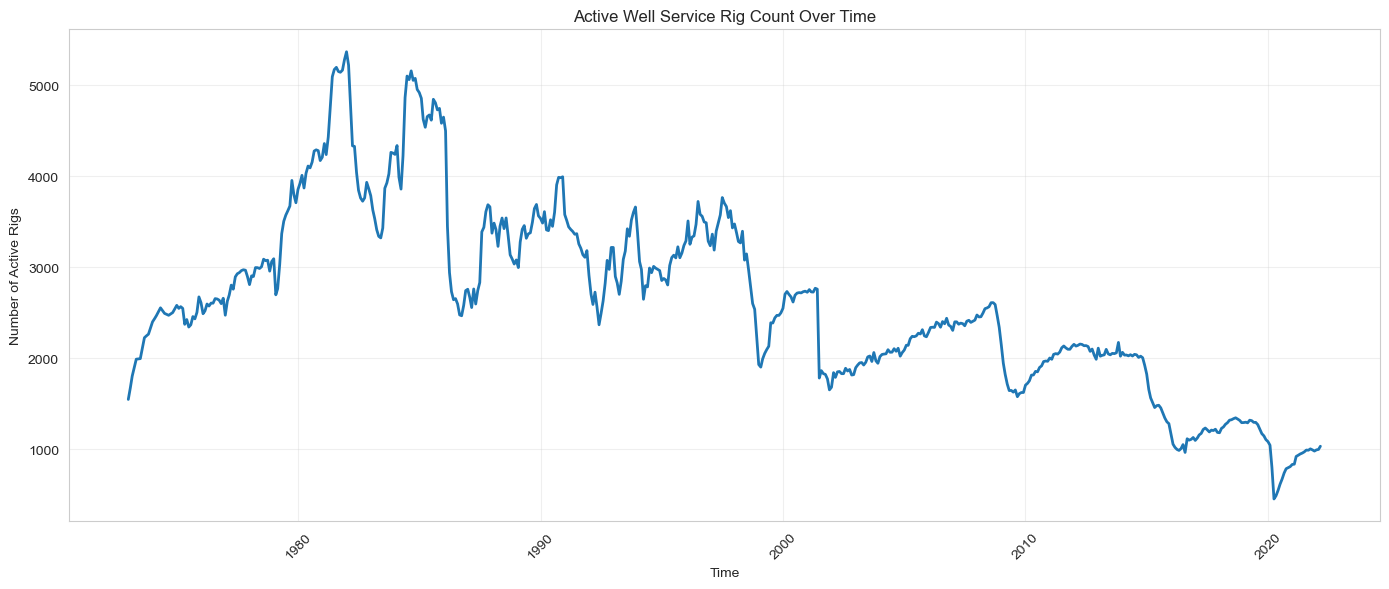

In [ ]:
drilling['time'] = pd.to_datetime(drilling['Month'], format='mixed')
drilling[['Month', 'time']].head(10)

rig_count_col = 'Active Well Service Rig Count (Number of Rigs)'
drilling[rig_count_col] = pd.to_numeric(drilling[rig_count_col], errors='coerce')

plt.figure(figsize=(14, 6))
plt.plot(drilling['time'], drilling[rig_count_col], linewidth=2)
plt.xlabel('Time')
plt.ylabel('Number of Active Rigs')
plt.title('Active Well Service Rig Count Over Time')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The overall trend is that there's a steep increases in the beginning, however after the 1960s we see a long-term decline over time. The data shows high volatility with sharp increases and decreases, likely reflecting oil price fluctuations and major economic events.

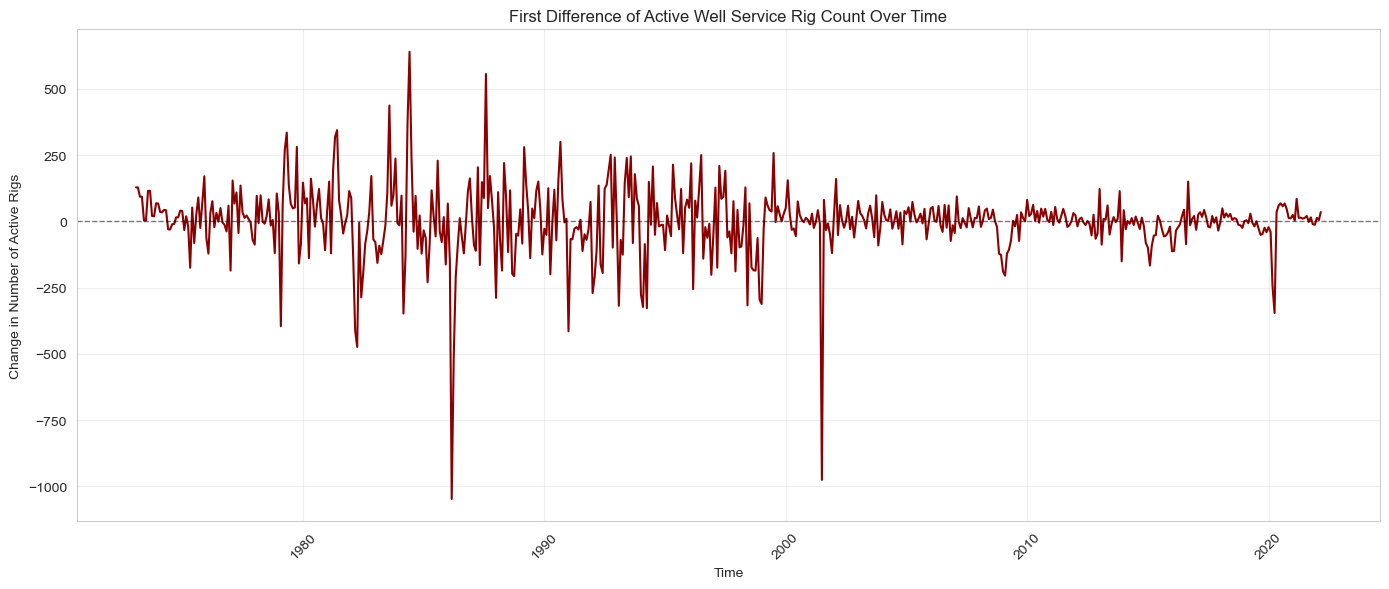

In [98]:
drilling['rig_count_diff'] = drilling[rig_count_col].diff()
plt.figure(figsize=(14, 6))
plt.plot(drilling['time'], drilling['rig_count_diff'], linewidth=1.5, color='darkred')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Change in Number of Active Rigs')
plt.title('First Difference of Active Well Service Rig Count Over Time')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The plot reveals highly volatile month-to-month changes in rig counts, with extreme shocks including drops of over 1000 rigs around 1986 and 2003. Volatility has decreased substantially since 2010, with changes mostly oscillating around zero and smaller in magnitude, suggesting the oil drilling industry has become more stable in recent years.

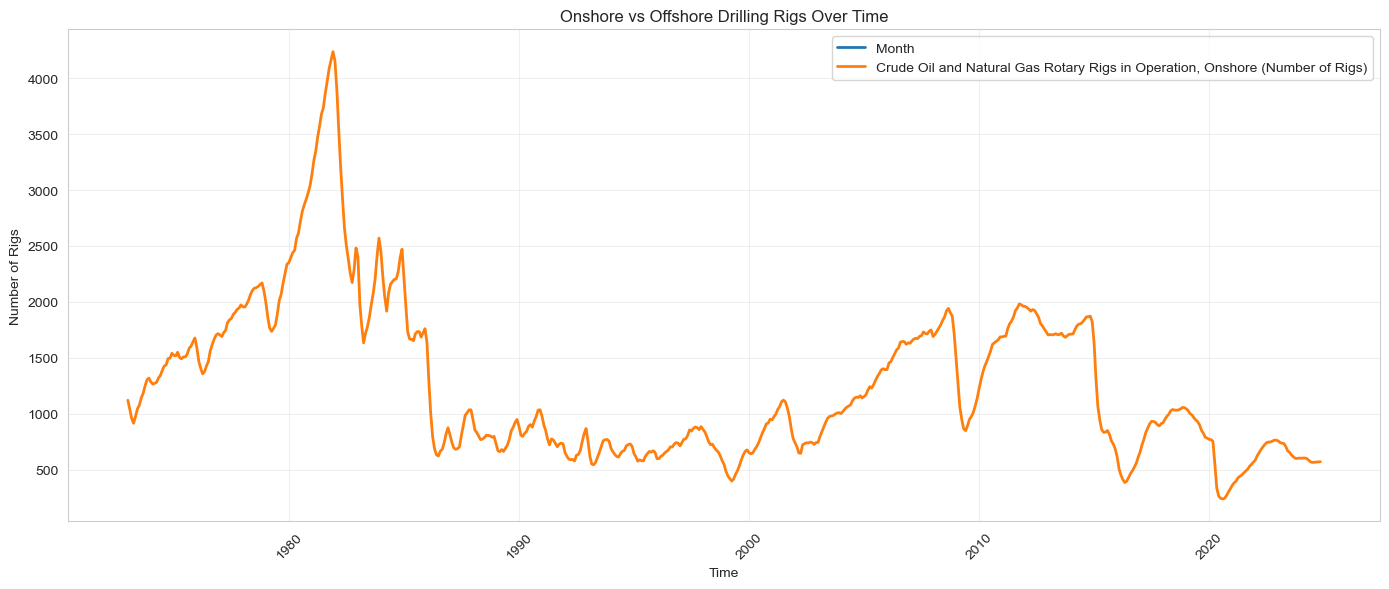

In [109]:
drilling[drilling.columns[0]] = pd.to_numeric(drilling[drilling.columns[0]], errors='coerce')
drilling[drilling.columns[1]] = pd.to_numeric(drilling[drilling.columns[1]], errors='coerce')

melted = pd.melt(drilling, 
                    id_vars=['time'], 
                    value_vars=[drilling.columns[0], drilling.columns[1]],
                    var_name='Rig Type',
                    value_name='Number of Rigs')
melted.head(10)

plt.figure(figsize=(14, 6))
for rig_type in melted['Rig Type'].unique():
    subset = melted[melted['Rig Type'] == rig_type]
    plt.plot(subset['time'], subset['Number of Rigs'], 
             label=rig_type, linewidth=2)

plt.xlabel('Time')
plt.ylabel('Number of Rigs')
plt.title('Onshore vs Offshore Drilling Rigs Over Time')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()